# 💡 Project Showcase: Regression Analysis for Bike-Sharing-Dataset 

*Objective of the analysis: Predication of bike rental count hourly or daily based on the environmental and seasonal settings.*

## Information about the Dataset: 

#### Features - 
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Step 1: Import the modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

### Step 2: Data loading and preprocessing

In [4]:
df = pd.read_excel('hour.xlsx')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,temp_new,atemp,atemp_new,hum,hum_new,windspeed,windspeed_new,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,24.0,0.2879,2879.0,0.81,81.0,0.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,22.0,0.2727,2727.0,0.80,80.0,0.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,22.0,0.2727,2727.0,0.80,80.0,0.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,24.0,0.2879,2879.0,0.75,75.0,0.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,24.0,0.2879,2879.0,0.75,75.0,0.0,0.0,0,1,1


In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,temp_new,atemp,atemp_new,hum,hum_new,windspeed,windspeed_new,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,49.698717,0.475775,4757.751021,0.627229,62.722884,0.190098,1900.976063,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,19.255612,0.171850,1718.502156,0.192930,19.292983,0.122340,1223.402286,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,34.000000,0.333300,3333.000000,0.480000,48.000000,0.104500,1045.000000,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,50.000000,0.484800,4848.000000,0.630000,63.000000,0.194000,1940.000000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,66.000000,0.621200,6212.000000,0.780000,78.000000,0.253700,2537.000000,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,100.000000,1.000000,10000.000000,1.000000,100.000000,0.850700,8507.000000,367.000000,886.000000,977.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  temp_new       17379 non-null  float64       
 12  atemp          17379 non-null  float64       
 13  atemp_new      17379 non-null  float64       
 14  hum            17379 non-null  float64       
 15  hum_new        1737

In [7]:
df_dummy=df.iloc[:,1:16]

In [8]:
df_dummy.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,temp_new,atemp,atemp_new,hum,hum_new
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,24.0,0.2879,2879.0,0.81,81.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,22.0,0.2727,2727.0,0.80,80.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,22.0,0.2727,2727.0,0.80,80.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,24.0,0.2879,2879.0,0.75,75.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,24.0,0.2879,2879.0,0.75,75.0


## Step 2: Preprocessing and EDA  

In [9]:
df.isnull().sum()

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
temp_new         0
atemp            0
atemp_new        0
hum              0
hum_new          0
windspeed        0
windspeed_new    0
casual           0
registered       0
cnt              0
dtype: int64

#### Our dataset does not have any null values.

Let us now change the feature names to make them more readable. 

In [10]:
df1 = df.rename(columns = {'dteday':'date','weathersit':'weather','yr':'year','mnth':'month',
                          'hr':'hour',
                          'hum':'humidity',
                          'cnt':'count'
                         })
df1.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,temp_new,atemp,atemp_new,humidity,hum_new,windspeed,windspeed_new,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,24.0,0.2879,2879.0,0.81,81.0,0.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,22.0,0.2727,2727.0,0.80,80.0,0.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,22.0,0.2727,2727.0,0.80,80.0,0.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,24.0,0.2879,2879.0,0.75,75.0,0.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,24.0,0.2879,2879.0,0.75,75.0,0.0,0.0,0,1,1


We drop the unnecessary columns for our regression analysis like 'instant', 'date' and 'year'

In [11]:
for col in df1:
    print(df1[col].value_counts(ascending=False), '\n\n\n')

1        1
11592    1
11578    1
11579    1
11580    1
        ..
5799     1
5800     1
5801     1
5802     1
17379    1
Name: instant, Length: 17379, dtype: int64 



2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: date, Length: 731, dtype: int64 



3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64 



1    8734
0    8645
Name: year, dtype: int64 



5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: month, dtype: int64 



17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hour, dtype: int64 



0    16879
1      500
Name: holiday, dtype: int64 



Insights
There seems to be no Junk/Unknown values in the entire dataset.

#### Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [12]:
df1 = df1.drop(columns=['instant','date','casual','registered'])

Let us now change the integer columns in our dataset that need to be used into categorical ones.

In [13]:
df1['season']=df1['season'].astype('category')
df1['weather']=df1['weather'].astype('category')
df1['month']=df1['month'].astype('category')
df1['weekday']=df1['weekday'].astype('category')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         17379 non-null  category
 1   year           17379 non-null  int64   
 2   month          17379 non-null  category
 3   hour           17379 non-null  int64   
 4   holiday        17379 non-null  int64   
 5   weekday        17379 non-null  category
 6   workingday     17379 non-null  int64   
 7   weather        17379 non-null  category
 8   temp           17379 non-null  float64 
 9   temp_new       17379 non-null  float64 
 10  atemp          17379 non-null  float64 
 11  atemp_new      17379 non-null  float64 
 12  humidity       17379 non-null  float64 
 13  hum_new        17379 non-null  float64 
 14  windspeed      17379 non-null  float64 
 15  windspeed_new  17379 non-null  float64 
 16  count          17379 non-null  int64   
dtypes: category(4), float64(8), int

In [15]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

df1 = pd.get_dummies(df1, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           17379 non-null  int64  
 1   hour           17379 non-null  int64  
 2   holiday        17379 non-null  int64  
 3   workingday     17379 non-null  int64  
 4   temp           17379 non-null  float64
 5   temp_new       17379 non-null  float64
 6   atemp          17379 non-null  float64
 7   atemp_new      17379 non-null  float64
 8   humidity       17379 non-null  float64
 9   hum_new        17379 non-null  float64
 10  windspeed      17379 non-null  float64
 11  windspeed_new  17379 non-null  float64
 12  count          17379 non-null  int64  
 13  season_2       17379 non-null  uint8  
 14  season_3       17379 non-null  uint8  
 15  season_4       17379 non-null  uint8  
 16  month_2        17379 non-null  uint8  
 17  month_3        17379 non-null  uint8  
 18  month_

In [16]:
df1.shape

(17379, 36)

In [17]:
df1.head()

,year,hour,holiday,workingday,temp,temp_new,atemp,atemp_new,humidity,hum_new,windspeed,windspeed_new,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
0,0,0,0,0,0.24,24.0,0.2879,2879.0,0.81,81.0,0.0,0.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0.22,22.0,0.2727,2727.0,0.80,80.0,0.0,0.0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,2,0,0,0.22,22.0,0.2727,2727.0,0.80,80.0,0.0,0.0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,3,0,0,0.24,24.0,0.2879,2879.0,0.75,75.0,0.0,0.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,4,0,0,0.24,24.0,0.2879,2879.0,0.75,75.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Splitting the data

Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
We will use train_test_split method from sklearn package for this

In [18]:
df1.columns

Index(['year', 'hour', 'holiday', 'workingday', 'temp', 'temp_new', 'atemp',
       'atemp_new', 'humidity', 'hum_new', 'windspeed', 'windspeed_new',
       'count', 'season_2', 'season_3', 'season_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.70, test_size = 0.30, random_state = 333)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12165 entries, 13699 to 8172
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12165 non-null  int64  
 1   hour           12165 non-null  int64  
 2   holiday        12165 non-null  int64  
 3   workingday     12165 non-null  int64  
 4   temp           12165 non-null  float64
 5   temp_new       12165 non-null  float64
 6   atemp          12165 non-null  float64
 7   atemp_new      12165 non-null  float64
 8   humidity       12165 non-null  float64
 9   hum_new        12165 non-null  float64
 10  windspeed      12165 non-null  float64
 11  windspeed_new  12165 non-null  float64
 12  count          12165 non-null  int64  
 13  season_2       12165 non-null  uint8  
 14  season_3       12165 non-null  uint8  
 15  season_4       12165 non-null  uint8  
 16  month_2        12165 non-null  uint8  
 17  month_3        12165 non-null  uint8  
 18  mon

In [21]:
df_train.shape

(12165, 36)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 15550 to 13349
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5214 non-null   int64  
 1   hour           5214 non-null   int64  
 2   holiday        5214 non-null   int64  
 3   workingday     5214 non-null   int64  
 4   temp           5214 non-null   float64
 5   temp_new       5214 non-null   float64
 6   atemp          5214 non-null   float64
 7   atemp_new      5214 non-null   float64
 8   humidity       5214 non-null   float64
 9   hum_new        5214 non-null   float64
 10  windspeed      5214 non-null   float64
 11  windspeed_new  5214 non-null   float64
 12  count          5214 non-null   int64  
 13  season_2       5214 non-null   uint8  
 14  season_3       5214 non-null   uint8  
 15  season_4       5214 non-null   uint8  
 16  month_2        5214 non-null   uint8  
 17  month_3        5214 non-null   uint8  
 18  mon

## Exploratory Data Analysis

In [23]:
df_test.shape

(5214, 36)

### Average usage of bikes for all types of users and weathers

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

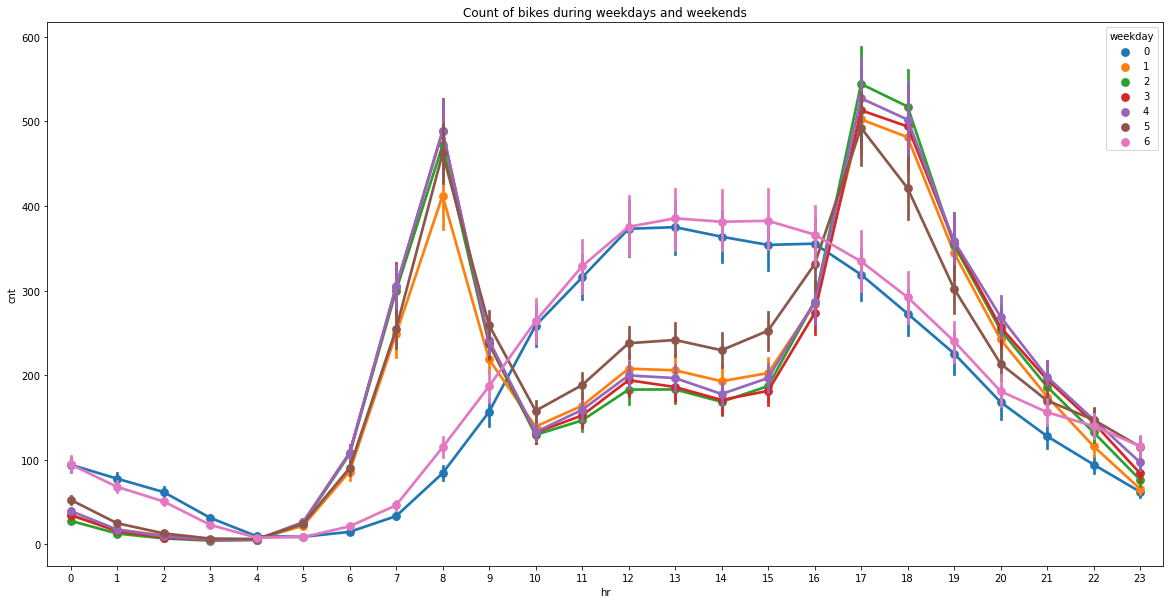

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

The above graph shows us the count of bikes for different hours of the day throughout the period of a week represented by 7 different colors. 

### Usage of bikes by Unregistered users

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

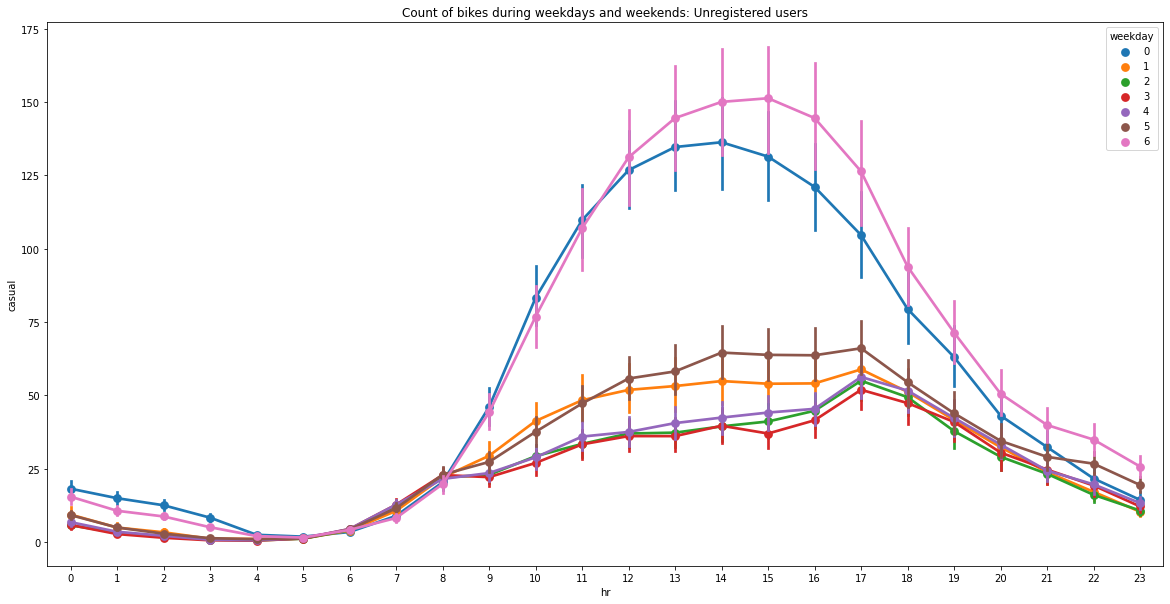

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

We now see the count of bikes througout the week for people who are unregistered in the bike-sharing mobile app. Here we see sunday and monday being the days where most bikes were rented. 

### By Registered users

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

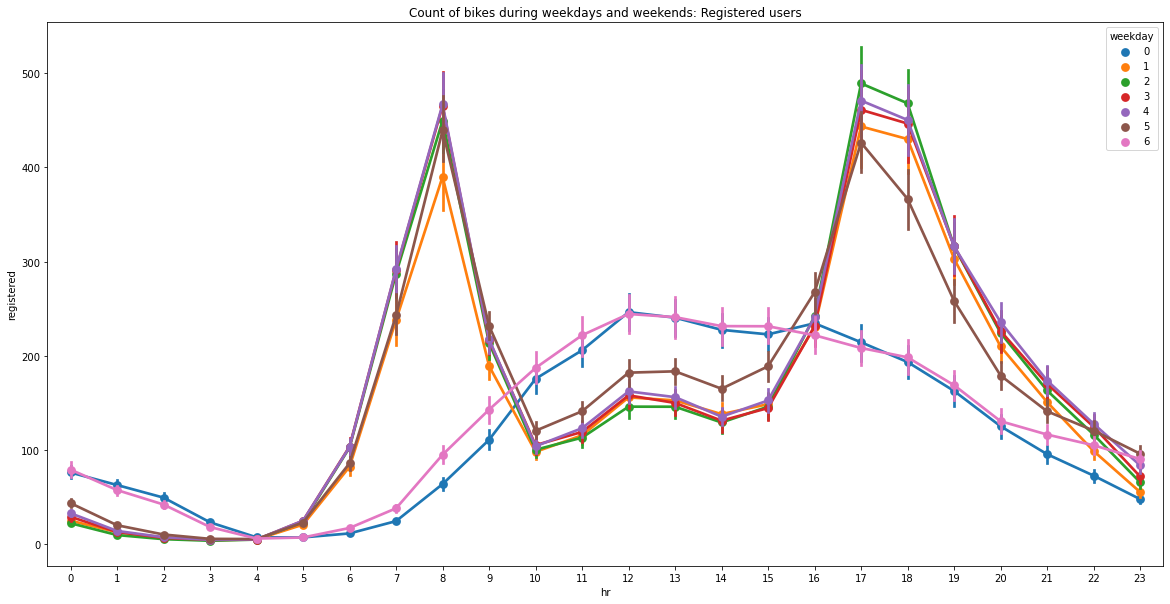

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

For registered users we see a lot of variations, with the weekdays dominating the charts with the most amount of bikes being rented instead of the weekends implying that people may need to get to work during the weekdays using these bikes and are thus more dependent on the app and have registered to it. 

### By different Weather conditions

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

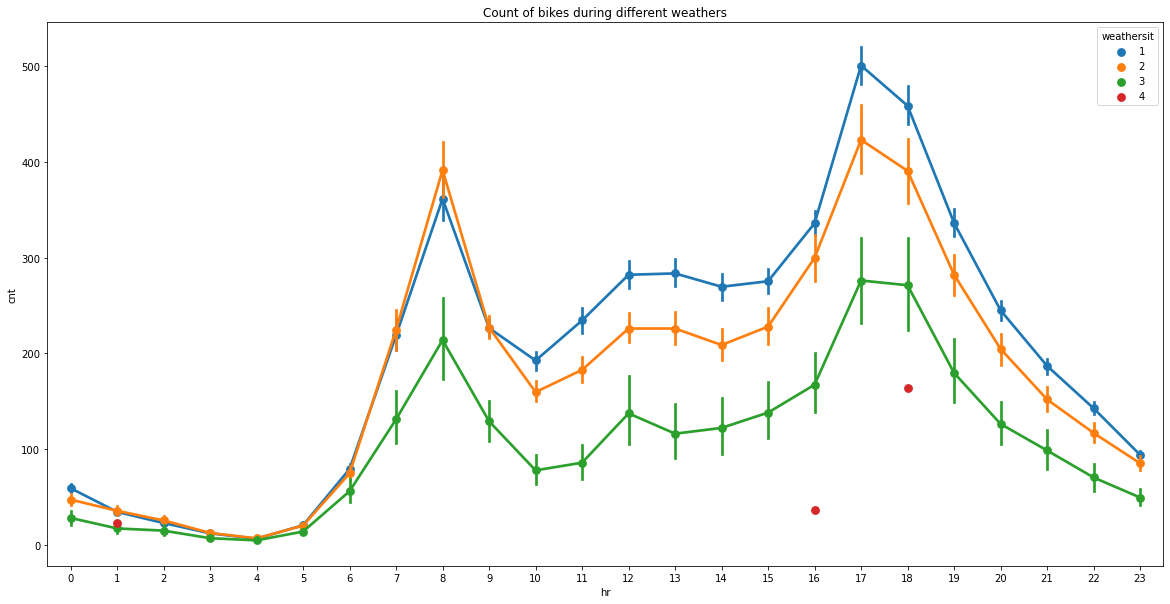

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax=ax)
ax.set(title='Count of bikes during different weathers')

1. Clear, Few clouds, Partly cloudy, Partly cloudy

2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We observe that mainly a sunny or a bit overcasted weather represented by orange and blue are the most favorable conditions for renting bikes with light snow and rain barely falling behind. However we can only see two red dots for heavy rain and thunderstorming weather which is pretty much understandable.

### By Different Seasons

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

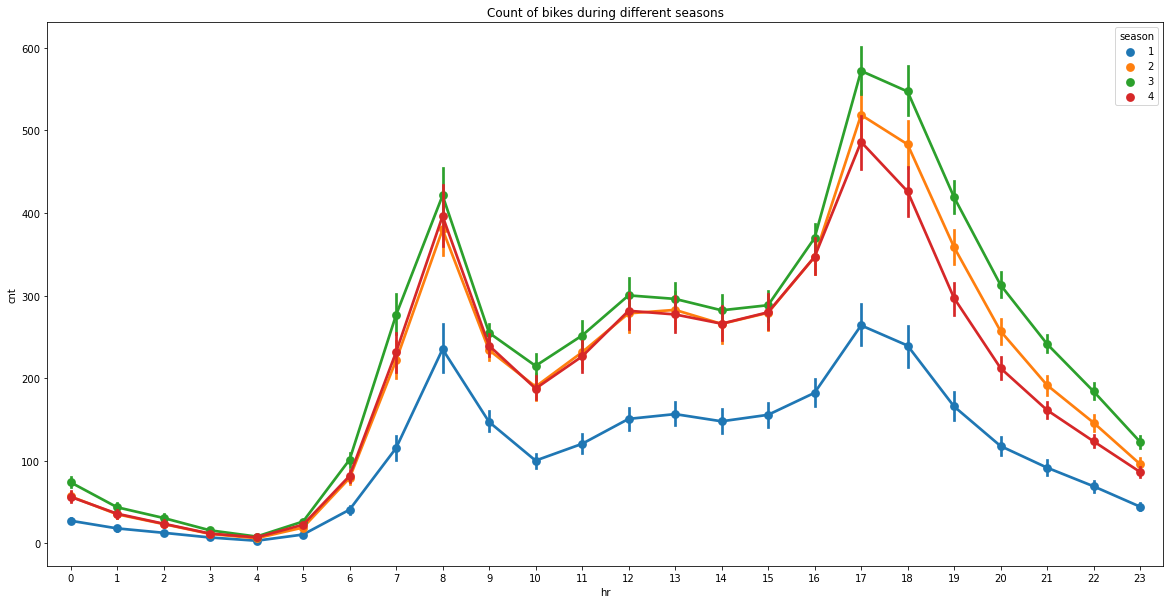

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

The weathers are categorised as
1. Spring 
2. Summer 
3. Fall 
4. Winter

We can observe that spring is the season where the least amount of bikes are being rented however in for every other season the renting of bikes is pretty much the same with Fall season being the most dominant.

### By different months

[Text(0.5, 1.0, 'Count of bikes during different months')]

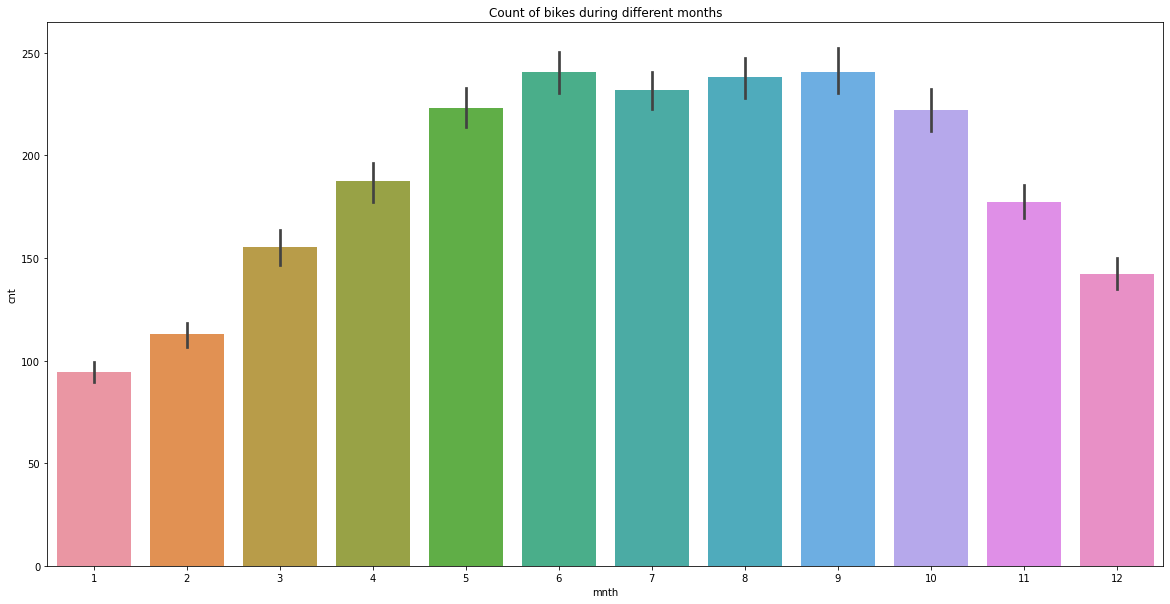

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

The months of the year pretty much imply the differnet seasons as well so if we compare the differnet seasons with relation to the months we can understand the similar results. 

### By different days

[Text(0.5, 1.0, 'Count of bikes during different days')]

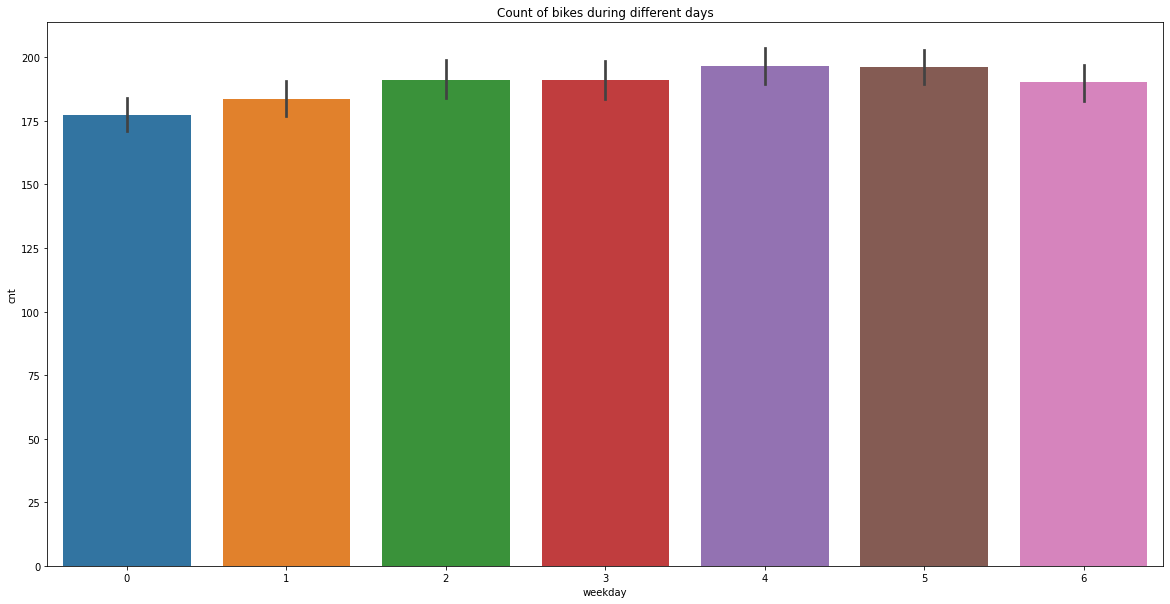

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

Since we have a mixed bag of users, we can see that the bikes are being used both by working professionals and casuals at a closely consistent rate throughout the different days

### By temperature and humidity

[Text(0.5, 1.0, 'Relation between humidity and users')]

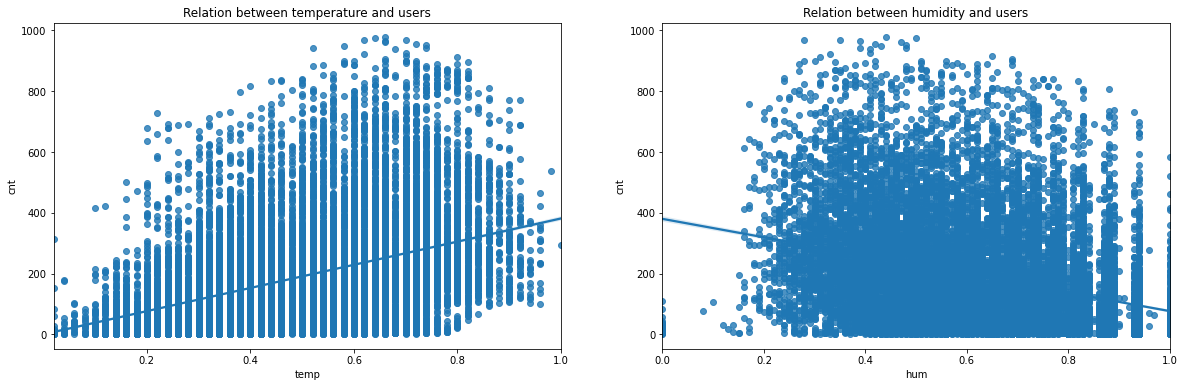

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

From the above regression plots we can see that the count of bikes rentd increases with increase in temperature and decreases with increase in humidity.

### Insights

There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Rescaling the features

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
df_train.head()

,year,hour,holiday,workingday,temp,temp_new,atemp,atemp_new,humidity,hum_new,windspeed,windspeed_new,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
13699,1,0,0,1,0.70,70.0,0.6667,6667.0,0.74,74.0,0.0896,896.0,58,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
256,0,1,0,1,0.16,16.0,0.1818,1818.0,0.86,86.0,0.1045,1045.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8916,1,9,0,1,0.32,32.0,0.3333,3333.0,0.81,81.0,0.1045,1045.0,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4248,0,22,0,1,0.70,70.0,0.6364,6364.0,0.42,42.0,0.1642,1642.0,207,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9585,1,8,0,1,0.20,20.0,0.1970,1970.0,0.64,64.0,0.2537,2537.0,484,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [35]:
df_train.columns

Index(['year', 'hour', 'holiday', 'workingday', 'temp', 'temp_new', 'atemp',
       'atemp_new', 'humidity', 'hum_new', 'windspeed', 'windspeed_new',
       'count', 'season_2', 'season_3', 'season_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [36]:
df_train.drop(columns=['temp','atemp','humidity','windspeed'])

,year,hour,holiday,workingday,temp_new,atemp_new,hum_new,windspeed_new,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
13699,1,0,0,1,70.0,6667.0,74.0,896.0,58,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
256,0,1,0,1,16.0,1818.0,86.0,1045.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8916,1,9,0,1,32.0,3333.0,81.0,1045.0,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4248,0,22,0,1,70.0,6364.0,42.0,1642.0,207,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9585,1,8,0,1,20.0,1970.0,64.0,2537.0,484,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0,21,0,0,26.0,2576.0,56.0,1642.0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3516,0,10,0,1,82.0,7879.0,56.0,1343.0,109,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5494,0,20,0,0,70.0,6667.0,79.0,2537.0,181,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
973,0,4,0,0,20.0,2121.0,69.0,1642.0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Apply scaler() to all the numeric variables

num_vars = ['temp_new', 'atemp_new', 'hum_new', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,year,hour,holiday,workingday,temp,temp_new,atemp,atemp_new,humidity,hum_new,windspeed,windspeed_new,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
13699,1,0,0,1,0.70,0.708333,0.6667,0.6667,0.74,0.74,0.0896,896.0,0.058402,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
256,0,1,0,1,0.16,0.145833,0.1818,0.1818,0.86,0.86,0.1045,1045.0,0.005123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8916,1,9,0,1,0.32,0.312500,0.3333,0.3333,0.81,0.81,0.1045,1045.0,0.234631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4248,0,22,0,1,0.70,0.708333,0.6364,0.6364,0.42,0.42,0.1642,1642.0,0.211066,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9585,1,8,0,1,0.20,0.187500,0.1970,0.1970,0.64,0.64,0.2537,2537.0,0.494877,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
df_train.describe()

,year,hour,holiday,workingday,temp,temp_new,atemp,atemp_new,humidity,hum_new,windspeed,windspeed_new,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.00000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.502096,11.556432,0.029182,0.681463,0.497141,0.497022,0.475860,0.475860,0.627360,0.627360,0.191094,1910.936210,0.193511,0.254501,0.259268,0.243074,0.075380,0.086642,0.08245,0.086889,0.082121,0.084998,0.085738,0.081381,0.082121,0.084423,0.087546,0.144431,0.139581,0.140485,0.143527,0.142622,0.144266,0.263543,0.082696,0.000247
std,0.500016,6.910420,0.168324,0.465928,0.192770,0.200802,0.171901,0.171901,0.193979,0.193979,0.122984,1229.835083,0.186241,0.435598,0.438251,0.428957,0.264015,0.281321,0.27506,0.281683,0.274560,0.278890,0.279988,0.273431,0.274560,0.278032,0.282645,0.351540,0.346566,0.347504,0.350623,0.349702,0.351374,0.440572,0.275434,0.015703
min,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.340000,0.333333,0.333300,0.333300,0.470000,0.470000,0.104500,1045.000000,0.038934,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.000000,0.000000,1.000000,0.500000,0.500000,0.484800,0.484800,0.630000,0.630000,0.194000,1940.000000,0.145492,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,18.000000,0.000000,1.000000,0.660000,0.666667,0.621200,0.621200,0.790000,0.790000,0.253700,2537.000000,0.287910,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,23.000000,1.000000,1.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,8507.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Linear Model 

In [40]:
y_train = df_train.pop('count')
X_train = df_train

## RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('hour', False, 11),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('temp_new', True, 1),
 ('atemp', True, 1),
 ('atemp_new', True, 1),
 ('humidity', True, 1),
 ('hum_new', True, 1),
 ('windspeed', False, 21),
 ('windspeed_new', False, 20),
 ('season_2', False, 2),
 ('season_3', False, 10),
 ('season_4', True, 1),
 ('month_2', False, 16),
 ('month_3', False, 3),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', True, 1),
 ('month_8', True, 1),
 ('month_9', False, 14),
 ('month_10', False, 13),
 ('month_11', False, 8),
 ('month_12', False, 15),
 ('weekday_1', False, 18),
 ('weekday_2', False, 5),
 ('weekday_3', False, 19),
 ('weekday_4', False, 17),
 ('weekday_5', False, 12),
 ('weekday_6', False, 6),
 ('weather_2', False, 4),
 ('weather_3', False, 9),
 ('weather_4', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'temp_new', 'atemp', 'atemp_new', 'humidity',
       'hum_new', 'season_4', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'weather_4'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['hour', 'workingday', 'windspeed', 'windspeed_new', 'season_2',
       'season_3', 'month_2', 'month_3', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weather_2', 'weather_3'],
      dtype='object')

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'STATS MODEL'

#### Model 1

VIF CHECK

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,inf
5,atemp_new,inf
6,humidity,inf
7,hum_new,inf
2,temp,18077.34
3,temp_new,16412.94
12,month_7,1.86
13,month_8,1.74
11,month_6,1.61
10,month_5,1.42


In [48]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [49]:
# Check the parameters obtained

lr1.params

const        0.093709
year         0.075946
holiday     -0.036040
temp         0.201454
temp_new     0.207896
atemp        0.051368
atemp_new    0.051368
humidity    -0.144738
hum_new     -0.144738
season_4     0.054392
month_4     -0.010342
month_5     -0.006850
month_6     -0.070575
month_7     -0.103133
month_8     -0.061530
weather_4    0.093602
dtype: float64

In [50]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     518.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:01   Log-Likelihood:                 5700.9
No. Observations:               12165   AIC:                        -1.138e+04
Df Residuals:                   12152   BIC:                        -1.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.007     13.645      0.0

### Model 2

Removing the variable 'atemp' based on its High p-value & High VIF

In [51]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

VIF Check

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,humidity,inf
6,hum_new,inf
2,temp,18077.34
3,temp_new,16412.94
4,atemp_new,42.90
11,month_7,1.86
12,month_8,1.74
10,month_6,1.61
9,month_5,1.42
7,season_4,1.37


In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [54]:
# Check the parameters obtained

lr2.params

const        0.093709
year         0.075946
holiday     -0.036040
temp         0.201454
temp_new     0.207896
atemp_new    0.102736
humidity    -0.144738
hum_new     -0.144738
season_4     0.054392
month_4     -0.010342
month_5     -0.006850
month_6     -0.070575
month_7     -0.103133
month_8     -0.061530
weather_4    0.093602
dtype: float64

In [55]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     518.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:01   Log-Likelihood:                 5700.9
No. Observations:               12165   AIC:                        -1.138e+04
Df Residuals:                   12152   BIC:                        -1.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.007     13.645      0.0

### Model 3

Removing the variable 'hum' based on its Very High 'VIF' value.

Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [56]:
X_train_new = X_train_new.drop(["hum_new"], axis = 1)

### VIF CHECK

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18077.34
3,temp_new,16412.94
4,atemp_new,42.90
10,month_7,1.86
11,month_8,1.74
9,month_6,1.61
8,month_5,1.42
6,season_4,1.37
7,month_4,1.20
5,humidity,1.06


In [58]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [59]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     518.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:01   Log-Likelihood:                 5700.9
No. Observations:               12165   AIC:                        -1.138e+04
Df Residuals:                   12152   BIC:                        -1.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.007     13.645      0.0

### Model 4

Removing the variable 'season3' based on its Very High 'VIF' value.
Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

### VIF CHECK

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18077.34
3,temp_new,16412.94
4,atemp_new,42.90
10,month_7,1.86
11,month_8,1.74
9,month_6,1.61
8,month_5,1.42
6,season_4,1.37
7,month_4,1.20
5,humidity,1.06


In [61]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [62]:
# Check the parameters obtained

lr4.params

const        0.093709
year         0.075946
holiday     -0.036040
temp         0.201454
temp_new     0.207896
atemp_new    0.102736
humidity    -0.289477
season_4     0.054392
month_4     -0.010342
month_5     -0.006850
month_6     -0.070575
month_7     -0.103133
month_8     -0.061530
weather_4    0.093602
dtype: float64

In [63]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     518.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:02   Log-Likelihood:                 5700.9
No. Observations:               12165   AIC:                        -1.138e+04
Df Residuals:                   12152   BIC:                        -1.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.007     13.645      0.0

### Model 5

VIF CHECK

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18077.34
3,temp_new,16412.94
4,atemp_new,42.90
10,month_7,1.86
11,month_8,1.74
9,month_6,1.61
8,month_5,1.42
6,season_4,1.37
7,month_4,1.20
5,humidity,1.06


In [65]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [66]:
# Check the parameters obtained

lr5.params

const        0.093709
year         0.075946
holiday     -0.036040
temp         0.201454
temp_new     0.207896
atemp_new    0.102736
humidity    -0.289477
season_4     0.054392
month_4     -0.010342
month_5     -0.006850
month_6     -0.070575
month_7     -0.103133
month_8     -0.061530
weather_4    0.093602
dtype: float64

In [67]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     518.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:02   Log-Likelihood:                 5700.9
No. Observations:               12165   AIC:                        -1.138e+04
Df Residuals:                   12152   BIC:                        -1.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.007     13.645      0.0

### Model 6

VIF CHECK

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18077.34
3,temp_new,16412.94
4,atemp_new,42.90
10,month_7,1.86
11,month_8,1.74
9,month_6,1.61
8,month_5,1.42
6,season_4,1.37
7,month_4,1.20
5,humidity,1.06


In [69]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [70]:
# Check the parameters obtained

lr6.params

const        0.093709
year         0.075946
holiday     -0.036040
temp         0.201454
temp_new     0.207896
atemp_new    0.102736
humidity    -0.289477
season_4     0.054392
month_4     -0.010342
month_5     -0.006850
month_6     -0.070575
month_7     -0.103133
month_8     -0.061530
weather_4    0.093602
dtype: float64

In [71]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     518.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:15:04   Log-Likelihood:                 5700.9
No. Observations:               12165   AIC:                        -1.138e+04
Df Residuals:                   12152   BIC:                        -1.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.007     13.645      0.0

### Insights
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# FINAL MODEL INTERPRETATION

### ASSUMPTIONS: 
Error terms are normally distributed with mean zero ( not X, Y)

In [72]:
# Residual Analysis on training data
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

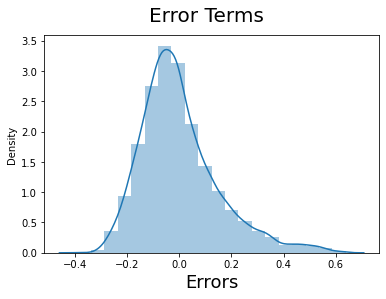

In [73]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

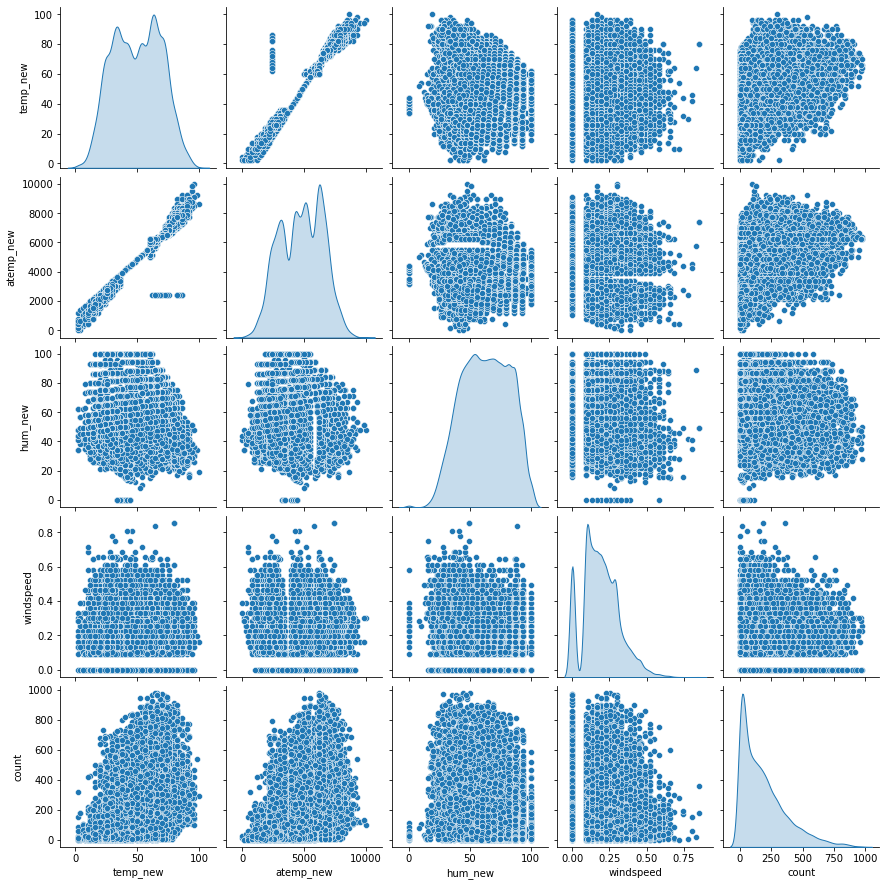

In [74]:
df_pariplot=df1[[ 'temp_new', 'atemp_new', 'hum_new', 'windspeed','count']]

sns.pairplot(df_pariplot, diag_kind='kde')
plt.show()

### Insight
Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

There is No Multicollinearity between the predictor variables

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18077.34
3,temp_new,16412.94
4,atemp_new,42.90
10,month_7,1.86
11,month_8,1.74
9,month_6,1.61
8,month_5,1.42
6,season_4,1.37
7,month_4,1.20
5,humidity,1.06


### Insight
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

#### Applying the scaling on the test sets

In [76]:
df_test.drop(columns=['temp','atemp','humidity','windspeed'])

,year,hour,holiday,workingday,temp_new,atemp_new,hum_new,windspeed_new,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
15550,1,3,0,1,56.0,5303.0,73.0,2537.0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
306,0,6,0,1,10.0,1818.0,54.0,0.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16728,1,19,0,1,48.0,4697.0,67.0,2239.0,460,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
8606,0,9,0,1,26.0,3030.0,75.0,0.0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3151,0,5,0,1,50.0,4848.0,93.0,1940.0,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,0,19,0,1,70.0,6515.0,61.0,1343.0,405,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10191,1,17,0,1,30.0,2727.0,45.0,2985.0,387,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
14860,1,9,0,0,58.0,5455.0,60.0,1343.0,296,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15423,1,20,0,1,50.0,4848.0,72.0,1642.0,360,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [77]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp_new', 'atemp_new', 'hum_new', 'windspeed_new','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

ValueError: operands could not be broadcast together with shapes (5214,5) (4,) (5214,5) 

## Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Distributional analysis: For checking the normalisation of the data

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df1['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df1['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

As we can see in the `Distribution of Users` graph, the data seems to be extremely left skewed so we need to normalise it to get better results. 

Also while observing the theoretical quantites the data don't match up with the range of values so we need to fix the range to get better results for our model.

In [ ]:
df1['count'] = np.log(df1['count'])

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df1['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df1['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

After normalising with `log` we find our data to be right skewed but with a much better distribution than before

Also the theoretical quantiles allows the values to line up with the regression line.

### Correlation Matrix

In [ ]:
corr = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

- From the confusion matrix we can see that `atemp` and `temp` represent the same pattern so we can delete `atemp`. 

- `casual` and `registered` are highly correalted to the target since adding them will give us the result so we drop them from the input as well.

- `windspeed` as well can be dropped since it is showing barely any importance for out target.

So overall we have to drop - `atemp`,`casual`,`registered`,`windspeed`



Let us now change the categorical columns with one hot encoding

## Step 3: Training the Model

Let us now drop the columns we found to be irrelevant from the confusion matrix observation and split the data into the independent and dependednt variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [ ]:
y = df1['count']
x = df1.loc[:,['season','month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp_new', 'atemp_new' ,'hum_new', 'windspeed']]

In [ ]:
y.head()

In [ ]:
x.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
cnt_pred = model.predict(X_test)

In [ ]:
plt.scatter(X_test.iloc[:,8], cnt_pred);
plt.scatter(X_test.iloc[:,8], y_test)

In [ ]:
# The coefficients

print('Coefficients: \n', model.coef_)

print('Intercept: \n', model.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, cnt_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, cnt_pred))